In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel(r"D:\Jupyter\Data Science\ML\SUPERVISIED LEARNING\CLASSIFICATION\CANCER DATASET\cancer.xlsx")
df

Gene One  Gene Two  Cancer Present
0          4.3       3.9               1
1          2.5       6.3               0
2          5.7       3.9               1
3          6.1       6.2               0
4          7.4       3.4               1
...        ...       ...             ...
2133       5.0       6.5               1
2134       3.4       6.6               0
2135       2.7       6.5               0
2136       3.3       5.6               0
2137       4.6       8.2               0

[2138 rows x 3 columns]

In [3]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [5]:
#modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=True)
dt_default.fit(X_train,y_train)
#prediction
ypred_train = dt_default.predict(X_train)
ybase_pred = dt_default.predict(X_test)
#evaluation
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(ypred_train,y_train))
print('test accuracy',accuracy_score(ybase_pred,y_test))
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(dt_default,X,y,cv=5).mean())

train accuracy 0.9690058479532164
test accuracy 0.8434579439252337
cross validation score 0.8596741009871085


# Modelling

In [6]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [7]:
X_train

Gene One  Gene Two
987        6.7       3.1
1973       8.9       3.2
577        6.8       4.2
1338       5.8       8.4
839        4.7       4.6
...        ...       ...
960        5.1       4.3
905        7.0       6.1
1096       5.3       2.2
235        3.0       7.1
1061       6.0       3.6

[1710 rows x 2 columns]

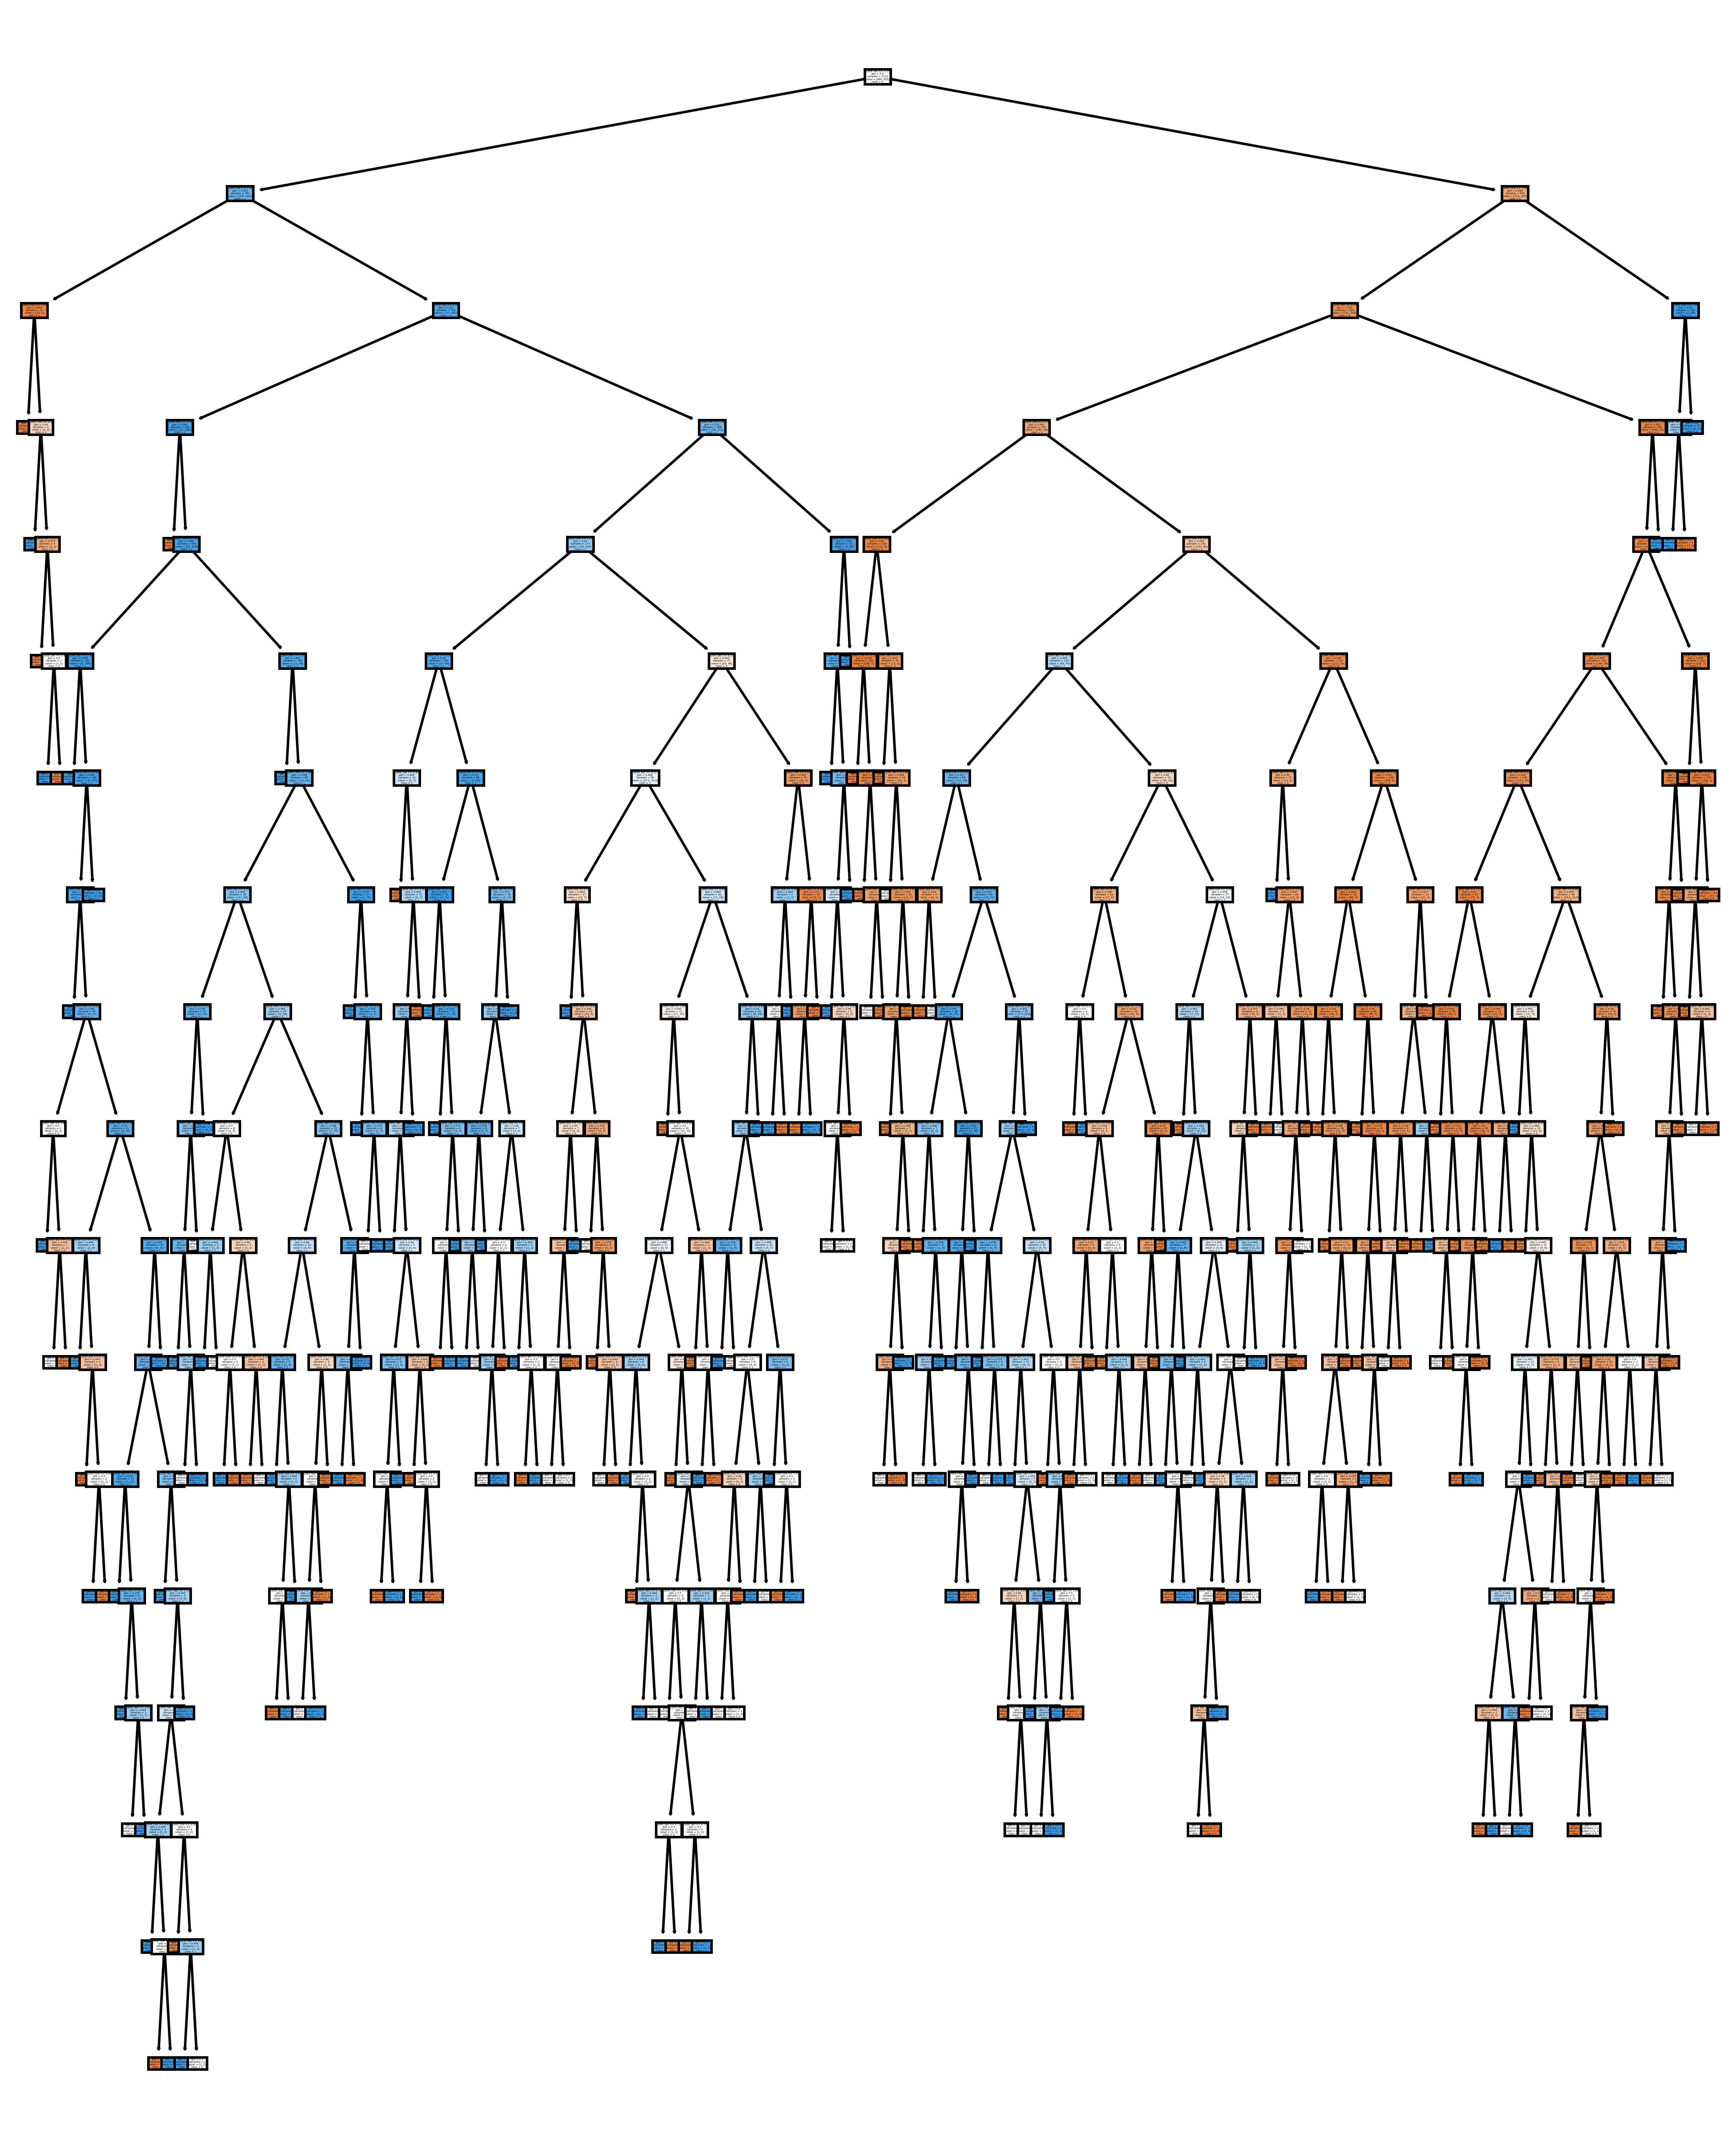

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,15),dpi = 500)
plot_tree(model,filled = True,feature_names=X_train.columns.tolist(),class_names =['0','1'])
plt.show()

In [9]:
print('depth of the tree:',model.get_depth())

depth of the tree: 17


# hyper parameter tuning using gridsearchcv

In [10]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state= True)

param_grid ={'criterion':['gini','Entropy'],'max_depth':range(1,16)}

grid = GridSearchCV(estimator,param_grid,scoring ='accuracy',cv= 5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

# 1st model with parameter

In [11]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',max_depth= 6,random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=True)

In [12]:
from sklearn.tree import plot_tree
plt.figure (figsize=(20,20),dpi=500)

plot_tree(model,filled=True,feature_names=X_train.columns.tolist(),
          class_names= ['0','1'])
plt.show()

**identify the unimportant features**

In [13]:
model.feature_importances_

array([0.48691699, 0.51308301])

In [14]:
s1 = pd.DataFrame(model.feature_importances_,
                  columns = ['feature_importance'],
                  index = X_train.columns.tolist())
imp =s1[s1['feature_importance']>0].index.tolist()
imp

['Gene One', 'Gene Two']

In [15]:
X_train = X_train[imp]

In [16]:
X_train

Gene One  Gene Two
987        6.7       3.1
1973       8.9       3.2
577        6.8       4.2
1338       5.8       8.4
839        4.7       4.6
...        ...       ...
960        5.1       4.3
905        7.0       6.1
1096       5.3       2.2
235        3.0       7.1
1061       6.0       3.6

[1710 rows x 2 columns]

In [17]:
X_test = X_test[imp]

In [18]:
X_test

Gene One  Gene Two
969        4.0       6.2
950        4.2       5.0
200        5.9       3.6
1289       6.9       7.2
1037       4.4       4.4
...        ...       ...
1894       3.9       4.5
1439       6.6       5.0
1785       4.9       2.8
104        5.6       3.3
1259       8.6       5.2

[428 rows x 2 columns]

In [19]:
X_train = X_train[imp]
X_test = X_test[imp]

 # Decision Tree with important parameters and with important columns

In [20]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',max_depth= 3,random_state=True)
model.fit(X_train,y_train) 

ypred_train = model.predict(X_train)
ybase_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(ypred_train,y_train))
print('test accuracy',accuracy_score(ybase_pred,y_test))
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(model,X,y,cv=5).mean())

train accuracy 0.8900584795321638
test accuracy 0.8925233644859814
cross validation score 0.888202849701241


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ybase_pred)

array([[191,  25],
       [ 21, 191]], dtype=int64)